# Denoising
Additive white gaussian noise, questions 1.1.1-1.1.2

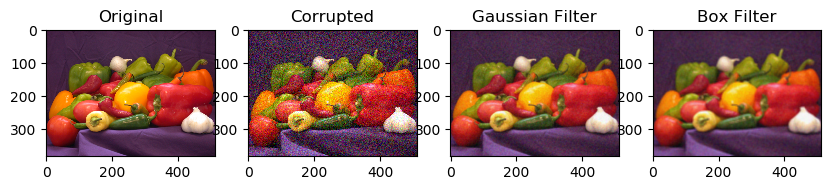


PSNR of Gaussian: 29.818882031582135

PSNR of box filter: 28.278396476904042


In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure

imgPeppers = cv2.imread("peppers.png")
imgPeppersCorrupted = cv2.imread("gaussian_noise_peppers.png")

# Convert images to RGB
imgPeppers = cv2.cvtColor(imgPeppers, cv2.COLOR_BGR2RGB)
imgPeppersCorrupted = cv2.cvtColor(imgPeppersCorrupted, cv2.COLOR_BGR2RGB)

# Compute Gaussian filtering of image, 7*7, varX=2
gaussian = cv2.GaussianBlur(imgPeppersCorrupted, (7,7), 2^2)

# Compute box filter and apply it to the corrupted image
boxFilter=np.ones((7,7), np.float32)/(7*7)
box = cv2.filter2D(imgPeppersCorrupted, -1, boxFilter)



# Set plot size
plot = plt.figure(num=None, figsize=(10,10), dpi=100)
# Add original image
ax = plot.add_subplot(1,4,1), plt.imshow(imgPeppers), plt.title("Original")
# Add corrupted image
ax2 = plot.add_subplot(1,4,2), plt.imshow(imgPeppersCorrupted), plt.title("Corrupted")
# Add Gaussian filtered image
ax3 = plot.add_subplot(1,4,3), plt.imshow(gaussian), plt.title("Gaussian Filter")
# Add Box filtered image
ax4 = plot.add_subplot(1,4,4), plt.imshow(box), plt.title("Box Filter")

plt.show()

print("\nPSNR of Gaussian:", skimage.measure.compare_psnr(imgPeppers, gaussian,255))
print("\nPSNR of box filter:", skimage.measure.compare_psnr(imgPeppers, box,255))





1.1.3: By comparing the PSNR obtained from both filters, even if it is very close, the box filter is superior in removing noise from the image. A lower Peak Signal to Noise Ratio signifies that there are less pixels which are noise compared to actual signal pixels. Such, a lower PSNR means that less noise is present in the image.

Salt and pepper noise, questions 1.1.4-1.1.5

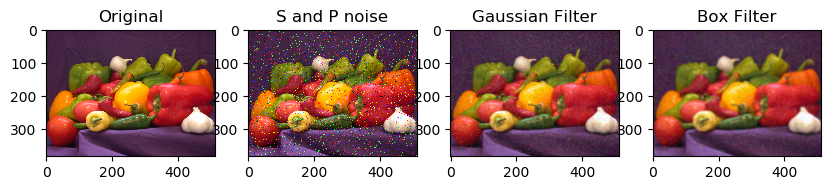


PSNR of Gaussian: 28.229831498788265

PSNR of box filter: 27.452837672106646


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.measure

# Read in base images
imgPeppers = cv2.imread("peppers.png")
imgPeppersSandP = cv2.imread("saltandpepper_noise_peppers.png")

# Convert images to RGB
imgPeppers = cv2.cvtColor(imgPeppers, cv2.COLOR_BGR2RGB)
imgPeppersSandP = cv2.cvtColor(imgPeppersSandP, cv2.COLOR_BGR2RGB)

# Compute gaussian filtering
gaussian = cv2.GaussianBlur(imgPeppersSandP, (7,7), 2^2)

# Compute box filter
boxFilter=np.ones((7,7), np.float32)/(7*7)
box = cv2.filter2D(imgPeppersSandP, -1, boxFilter)

# Set plot size
plot = plt.figure(num=None, figsize=(10,10), dpi=100)
# Add original image
ax = plot.add_subplot(1,4,1), plt.imshow(imgPeppers), plt.title("Original")
# Add corrupted image
ax2 = plot.add_subplot(1,4,2), plt.imshow(imgPeppersSandP), plt.title("S and P noise")
# Add Gaussian filtered image
ax3 = plot.add_subplot(1,4,3), plt.imshow(gaussian), plt.title("Gaussian Filter")
# Add Box filtered image
ax4 = plot.add_subplot(1,4,4), plt.imshow(box), plt.title("Box Filter")

plt.show()

print("\nPSNR of Gaussian:", skimage.measure.compare_psnr(imgPeppers, gaussian,255))
print("\nPSNR of box filter:", skimage.measure.compare_psnr(imgPeppers, box,255))


1.1.6 Comparing the PSNR values between the gaussian filter and the box filter, it is apparent that the box filter is more efficient at removing the salt and pepper noise. However, looking at the images, the image filtered using the box filter is much more blurred that the one where the gaussian filter was applied, such that all edges are attenuated. The image filtered by the Gaussian filter is still more noisy, but is also less blurred.